In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pyproj
import numpy as np

In [4]:
import utm

# read data

In [5]:
rock = pd.read_csv('Geochemistry Data/CNS rock samples.csv')

/home/serj/anaconda3/envs/engine/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,10,16,18,23,37,38,44,45,48,49,58,92,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# coords to meter

In [7]:
rock['WH_LAT'] = pd.to_numeric(rock['WH_LAT'], errors = 'coerce')

In [8]:
rock = rock.loc[(~rock['WH_LAT'].isnull()) & (~rock['WH_LONG'].isnull()), :]

In [142]:
rock['WH_LAT']

393      55.954326
394      55.954326
395      55.954326
396      55.954326
397      55.954326
398      55.954326
399      55.954326
400      55.954326
401      55.954326
402      55.954326
403      55.954326
404      55.954326
405      55.954326
406      55.954326
407      55.954326
408      55.954326
409      55.954326
410      55.954326
411      55.954326
412      55.954326
413      55.954326
414      55.954326
415      55.954326
416      55.954326
417      55.954326
418      55.954326
419      55.954326
420      55.954326
421      55.954326
422      55.954326
           ...    
14775    58.437791
14776    58.437791
14777    58.384575
14778    58.384575
14779    58.384575
14780    58.384575
14781    58.384575
14782    58.384575
14783    58.384575
14784    58.384575
14785    58.384575
14786    58.384575
14787    58.384575
14788    58.384575
14789    58.384575
14790    58.384575
14791    58.384575
14792    58.384575
14793    58.384575
14794    58.384575
14795    58.384575
14796    58.

In [9]:
lat = rock['WH_LAT'].values
long = rock['WH_LONG'].values

In [10]:
x, y, num, let = [], [], [], []
for la, lo in zip(lat, long): 
    res = utm.from_latlon(la, lo, force_zone_number=31, force_zone_letter='V')
    x.append(res[0])
    y.append(res[1])
    num.append(res[2])
    let.append(res[3])

In [11]:
rock['x'] = x
rock['y'] = y

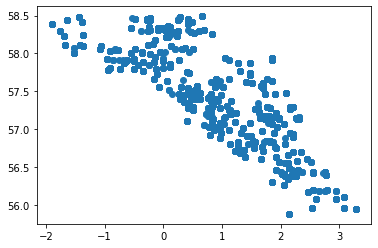

In [12]:
plt.plot(rock['WH_LONG'], rock['WH_LAT'], 'o')

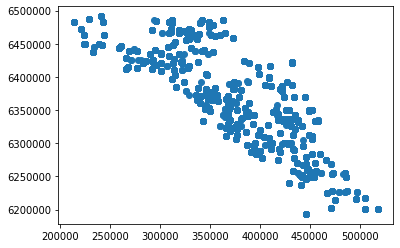

In [13]:
plt.plot(rock['x'], rock['y'], 'o')

In [14]:
rock['SH_DEPTH_TOP_FT'] = pd.to_numeric(rock['SH_DEPTH_TOP_FT'], errors = 'coerce')

In [15]:
rock['SH_DEPTH_TOP_FT'].isnull().sum()

0

# separate rock eval from ooil analyzer

In [23]:
from copy import copy

In [79]:
rockre = rock.loc[(rock['RP_METHOD'].isin(['RockEval', 'Oil analyzer']) ) & (~rock['WH_LAT'].isnull()) & (~rock['WH_LONG'].isnull()), :]

In [80]:
rockre = copy(rockre)

In [81]:
rockre['rp_method_cat'] = rockre['RP_METHOD'].astype('category').cat.codes
rockre['rp_lab_cat'] = rockre['RP_LAB'].astype('category').cat.codes

# check dict

In [82]:
x, y, z = 518069.859848, 6.201034e+06, 10305.45

In [90]:
rockre['distance'] = 0

In [91]:
rockre.loc[:, 'distance'] = ((rockre['x'] - x) ** 2 + (rockre['x'] - x) ** 2 + (rockre['SH_DEPTH_TOP_FT'] - z) ** 2) ** 0.5

In [139]:
rock_feats = [
    'TOC', 'rp_method_cat', 
    'rp_lab_cat', 
    'REV_TOTS1', 'REV_TOTS2', 
    'REV_TOTS3', 'REV_TMAX', 'H_INDEX', 'O_INDEX', 'P_INDEX', 
    'distance'
]

In [140]:
def get_rock_features(x, y, z, formation=None): 
    table_to_search = rockre
    if formation: 
        table_to_search = rockre.loc[rockre['FORMATION'] == formation, :]
    table_to_search.loc[:, 'distance'] = (
        (rockre['x'] - x) ** 2 + (rockre['x'] - x) ** 2 + 
        (rockre['SH_DEPTH_TOP_FT'] - z) ** 2
    ) ** 0.5
    return table_to_search.sort_values('distance').iloc[0][rock_feats]

In [141]:
get_rock_features(518069.859848, 6.201034e+06, 10305.45, formation='Heather Formation')

TOC                   2.6
rp_method_cat           0
rp_lab_cat              1
REV_TOTS1            0.81
REV_TOTS2            0.36
REV_TOTS3             NaN
REV_TMAX              422
H_INDEX           13.8462
O_INDEX               NaN
P_INDEX          0.692308
distance          45317.9
Name: 1253, dtype: object

In [138]:
rockre[(rockre['FORMATION'] == 'Valhall Formation') & (rock['RP_METHOD'].isin(['RockEval', 'Oil analyzer']))]['TOC']

/home/serj/anaconda3/envs/engine/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


498      1.2
532      9.8
533      NaN
534      8.7
535      0.3
578      6.9
1275     1.9
1276       3
1277     1.8
1278     0.8
1279     1.3
1280     1.8
1281     1.1
1434     1.1
1714       3
1828     2.1
1829     2.2
1831       2
1832     1.6
2263     0.7
2501     1.4
2633     3.9
2634     6.6
2635     2.5
2998     1.5
3365     1.1
3374     1.1
3487     1.3
3490     1.7
3493     1.2
        ... 
11787    0.8
11790    1.2
11791      1
11793    0.4
11796      1
11797    0.9
11798    1.6
11880    0.4
11881      3
12033    1.5
12551    0.5
12552    1.6
12553    0.5
12939    3.5
13271    1.2
13818    3.4
13819    2.6
13820    0.5
13867    4.5
13868    1.6
13993      2
13997    0.7
14002    1.5
14005    1.4
14007    1.5
14010    1.7
14011    1.3
14017    3.8
14018    1.9
14621    2.2
Name: TOC, Length: 343, dtype: object

In [133]:
rockre['FORMATION'].value_counts()

Kimmeridge Clay Formation      2110
Heather Formation               514
Valhall Formation               343
Pentland Formation              324
Fulmar Formation                211
Skagerrak Formation              85
Lossiemouth Formation            79
Smith Bank Formation             68
Ekofisk Formation                63
Piper Formation                  51
Lark Formation                   40
Sele Formation                   33
Dornoch Formation                31
Sele S1                          28
Lista Formation                  26
Rodby Formation                  22
Plenus Marl Formation            21
Volcanics                        20
Horda Formation                  17
Hidra Formation                  16
Maureen Formation                16
Tor Formation                    13
Balder Formation                 13
Hod Formation                    12
Rodby R2                         12
Lower Heather Formation           9
Sele S2b                          9
Kupferschiefer Formation    